In [1]:
from quantileRegression import quantileRegression
import numpy as np
import runNumbers as rn

Welcome to ROOTaaS 6.06/08


In [ ]:

#---------------------------------------------------------------------
#TEST USING QUANTILE REGRESSION ON ALL DATA, WITH AND WITHOUT WEIGHTS
#---------------------------------------------------------------------


In [2]:
# Variable you want to correct
ylist = ["R9"]#, "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi", "SigmaRR", 'CovarianceIetaIphi', 'PhoIso03', 'ChIso03', 'ChIso03worst']
# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list
# Set the quantiles 
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [3]:
# Initialize the quantile regression object for mc
qr_mc_NoWeights= quantileRegression("mc")
qr_mc_ConWeights= quantileRegression("mc")

print "Load the mc dataframe"
startEvtmc = 0
stopEvtmc   = 2000000
print "Load the mc dataframe"
qr_mc_NoWeights.loadDF("/mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_mc/",
             "cicNoSigmaIetaIeta/trees/",
             ["DYJetsToLL_13TeV_EBHighR9", "DYJetsToLL_13TeV_EBLowR9", "DYJetsToLL_13TeV_EEHighR9", "DYJetsToLL_13TeV_EELowR9" ],
             startEvtmc, stopEvtmc, 12345)
qr_mc_ConWeights.loadDF("/mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_mc/",
             "cicNoSigmaIetaIeta/trees/",
             ["DYJetsToLL_13TeV_EBHighR9", "DYJetsToLL_13TeV_EBLowR9", "DYJetsToLL_13TeV_EEHighR9", "DYJetsToLL_13TeV_EELowR9" ],
             startEvtmc, stopEvtmc, 12345)

Load the mc dataframe
Load the mc dataframe
NT branches: 
['run', 'rho', 'nvtx', 'mass', 'weight', 'leadEleMatch', 'subleadEleMatch', 'leadPt', 'leadScEta', 'leadPhi', 'leadScEnergy', 'leadScPreshowerEnergy', 'leadSigmaRR', 'leadPhoIso03', 'leadChIso03', 'leadChIso03worst', 'leadPhoIDMVA', 'leadR9', 'leadS4', 'leadEtaWidth', 'leadPhiWidth', 'leadSigmaIeIe', 'leadCovarianceIetaIphi', 'leadCovarianceIphiIphi', 'subleadPt', 'subleadScEta', 'subleadPhi', 'subleadScEnergy', 'subleadScPreshowerEnergy', 'subleadSigmaRR', 'subleadPhoIso03', 'subleadChIso03', 'subleadChIso03worst', 'subLeadPhoIDMVA', 'subleadR9', 'subleadS4', 'subleadEtaWidth', 'subleadPhiWidth', 'subleadSigmaIeIe', 'subleadCovarianceIetaIphi', 'subleadCovarianceIphiIphi']
trees:  ['cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EBHighR9', 'cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EBLowR9', 'cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EEHighR9', 'cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EELowR9']
Adding trees into a DataFrame
  addi

In [4]:
print "Get the corrected data-mc values"
qr_mc_NoWeights.correctAllY(X, ylist, quantiles,relativePath= "weights_AllNoWeights")
qr_mc_ConWeights.correctAllY(X, ylist, quantiles,relativePath= "weights_AllConWeights")

dfmc_NoWeights= qr_mc_NoWeights.getDF()
dfmc_ConWeights= qr_mc_ConWeights.getDF()

Get the corrected data-mc values
Corrected variables file (e.g.  correctedTargetsweights_AllNoWeights.h5  ) does not exists. This will take a while...
Correct both EB and EE together
Loading mc weights for  R9  : 
    ./weights/weights_AllNoWeights/mc_weights
Loading data weights for  R9
    ./weights/weights_AllNoWeights/data_weights
Get corrections for  R9  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  R9
Writing correctedTargets.h5
Corrected variables file (e.g.  correctedTargetsweights_AllConWeights.h5  ) does not exists. This will take a while...
Correct both EB and EE together
Loading mc weights for  R9  : 
    ./weights/weights_AllConWeights/mc_weights
Loading data weights for  R9
    ./weights/weights_AllConWeights/data_weights
Get corrections for  R9  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  R9
Writing correctedTargets.h5


In [5]:
# just need to load the data for plotting 
qr_data = quantileRegression("data")
startEvtdata = 0
stopEvtdata   = 2000000
print "Load the data dataframe"
qr_data.loadDF(" /mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_data/",
               "cicNoSigmaIetaIeta/trees/",
               ["Data_13TeV_EBHighR9", "Data_13TeV_EBLowR9", "Data_13TeV_EEHighR9", "Data_13TeV_EELowR9" ],
               startEvtdata, stopEvtdata, rn.run2016B[0],rn.run2016D[1])
dfdata = qr_data.getDF()

Load the data dataframe
NT branches: 
['run', 'rho', 'nvtx', 'mass', 'weight', 'leadHLT_Ele27_WPTight_Gsf_vMatch', 'subleadHLT_Ele27_WPTight_Gsf_vMatch', 'leadEleMatch', 'subleadEleMatch', 'leadPt', 'leadScEta', 'leadPhi', 'leadScEnergy', 'leadScPreshowerEnergy', 'leadSigmaRR', 'leadPhoIso03', 'leadChIso03', 'leadChIso03worst', 'leadPhoIDMVA', 'leadR9', 'leadS4', 'leadEtaWidth', 'leadPhiWidth', 'leadSigmaIeIe', 'leadCovarianceIetaIphi', 'leadCovarianceIphiIphi', 'subleadPt', 'subleadScEta', 'subleadPhi', 'subleadScEnergy', 'subleadScPreshowerEnergy', 'subleadSigmaRR', 'subleadPhoIso03', 'subleadChIso03', 'subleadChIso03worst', 'subLeadPhoIDMVA', 'subleadR9', 'subleadS4', 'subleadEtaWidth', 'subleadPhiWidth', 'subleadSigmaIeIe', 'subleadCovarianceIetaIphi', 'subleadCovarianceIphiIphi']
trees:  ['cicNoSigmaIetaIeta/trees/Data_13TeV_EBHighR9', 'cicNoSigmaIetaIeta/trees/Data_13TeV_EBLowR9', 'cicNoSigmaIetaIeta/trees/Data_13TeV_EEHighR9', 'cicNoSigmaIetaIeta/trees/Data_13TeV_EELowR9']
Addin

In [6]:
# Some basic plots
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
plt.style.use('ggplot')

['R9']
plotting  R9


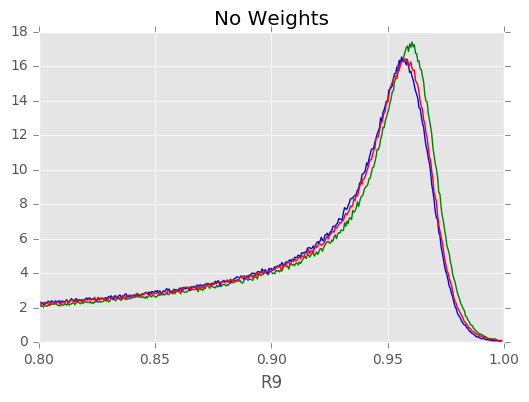

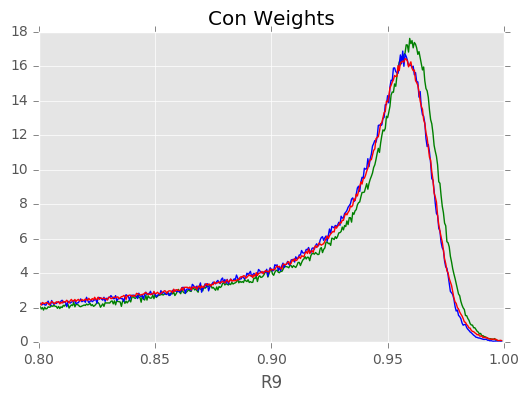

In [12]:
print ylist
for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar

    rv = []
    if yvar == "R9":
        rv  = np.arange(0.0,1.0,0.001)
        rv2 = np.arange(0.8,1.0,0.0005)
        rv3 = np.arange(0.8,0.95,0.008)
        
    if yvar == "S4":
        rv  = np.arange(0.0,1.0,0.001)
        rv2 = np.arange(0.8,1.0,0.001)
    if yvar == "SigmaIeIe":
        rv = np.arange(0.0,0.015,0.0001)
        rv2 = np.arange(0.015,0.030,0.0001)
    if yvar == "EtaWidth":
        rv = np.arange(0.0,0.05,0.0001)
        rv2 = np.arange(0.005,0.025,0.0001)
    if yvar == "PhiWidth":
        rv = np.arange(0.0,0.2,0.001)
        rv2 = np.arange(0.0,0.05,0.0003)
    if yvar == "CovarianceIphiIphi":
        rv  = np.arange(0.0, 0.02,0.0001)
        rv2 = np.arange(0.02, 0.05,0.0005)
    if yvar == "SigmaRR":
        rv = np.arange(1, 12.0,0.1) 
        rv2 = np.arange(1, 12.0,0.1)
    if yvar == "CovarianceIetaIphi":
        rv = np.arange(-0.0002, 0.0002,0.0000001) 
        rv2 = np.arange(-0.00005, 0.00005,0.0000001)
    if yvar == "PhoIso03":
        rv = np.arange(-0.05, 0.05,0.0005) 
        rv2 = np.arange(0.1, 5.0,0.05)
    if yvar == "ChIso03":
        rv = np.arange(-0.05, 0.05,0.0005) 
        rv2 = np.arange(0.1, 5.,0.05)
    if yvar == "ChIso03worst":
        rv = np.arange(-0.05, 0.05,0.0005) 
        rv2 = np.arange(0.1, 5.0, 0.05)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    mc_bins, _edges = np.histogram(dfmc_NoWeights[yvar], rv2, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges,mc_bins,"g")
    mccorr_bins, _edges = np.histogram(dfmc_NoWeights[yvarcorr], rv2, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges  ,mccorr_bins,"b")
    data_bins, _edges = np.histogram(dfdata[yvar], rv2, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges  ,data_bins,"r")
    ax.set_title('No Weights')
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    mc_bins, _edges = np.histogram(dfmc_ConWeights[yvar], rv2, normed = 1, weights=dfmc_ConWeights["weight"])
    edges = _edges[:len(_edges)-1]
    plt.plot(edges,mc_bins,"g")
    mccorr_bins, _edges = np.histogram(dfmc_ConWeights[yvarcorr], rv2, normed = 1, weights=dfmc_ConWeights["weight"])
    edges = _edges[:len(_edges)-1]
    plt.plot(edges  ,mccorr_bins,"b")
    data_bins, _edges = np.histogram(dfdata[yvar], rv2, normed = 1,weights=dfdata["weight"])
    edges = _edges[:len(_edges)-1]
    plt.plot(edges  ,data_bins,"r")
    ax.set_title('Con Weights')

['R9']
plotting  R9


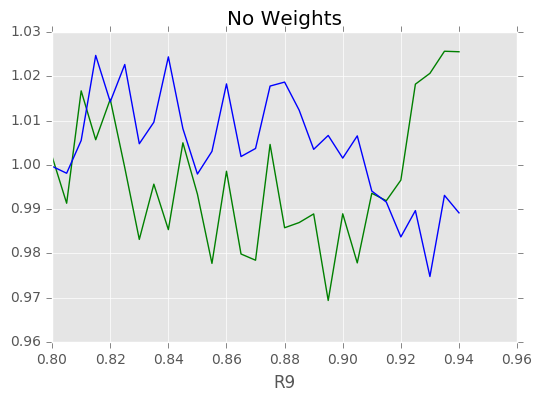

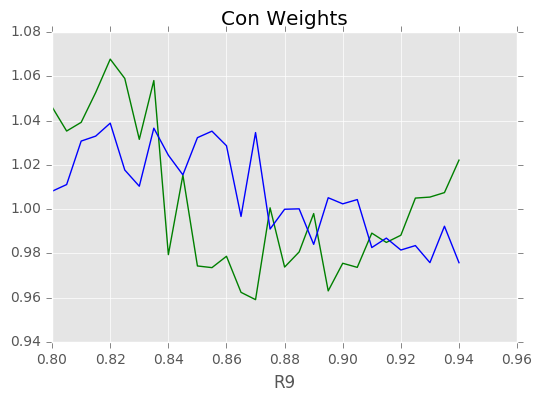

In [15]:
#ratio plots
print ylist
for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar

    rv = []
    if yvar == "R9":
        rv  = np.arange(0.0,1.0,0.001)
        rv2 = np.arange(0.7,1.0,0.0005)
        rv3 = np.arange(0.8,0.95,0.005)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    mc_bins, _edges = np.histogram(dfmc_NoWeights[yvar], rv3, normed = 1)
    edges = _edges[:len(_edges)-1]

    mccorr_bins, _edges = np.histogram(dfmc_NoWeights[yvarcorr], rv3, normed = 1)
    edges = _edges[:len(_edges)-1]

    data_bins, _edges = np.histogram(dfdata[yvar], rv3, normed = 1)
    edges = _edges[:len(_edges)-1]
    
 
    
    h1 = data_bins/mc_bins
    h2 = data_bins/mccorr_bins
    
    plt.plot(edges,h1,"g")# uncorrected
    plt.plot(edges,h2,"b")#corrected
    ax.set_title('No Weights')
    
    #ratio plot
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    mc_bins, _edges = np.histogram(dfmc_ConWeights[yvar], rv3, normed = 1, weights=dfmc_ConWeights["weight"])
    edges = _edges[:len(_edges)-1]

    mccorr_bins, _edges = np.histogram(dfmc_ConWeights[yvarcorr], rv3, normed = 1, weights=dfmc_ConWeights["weight"])
    edges = _edges[:len(_edges)-1]

    data_bins, _edges = np.histogram(dfdata[yvar], rv3, normed = 1, weights=dfdata["weight"])
    edges = _edges[:len(_edges)-1]
    
 
    
    h1 = data_bins/mc_bins
    h2 = data_bins/mccorr_bins
    
    plt.plot(edges,h1,"g")# uncorrected
    plt.plot(edges,h2,"b")#corrected
    ax.set_title('Con Weights')
